In [1]:
#######################################################################################################
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import os
import sys

# Get the current notebook's directory
notebook_dir = os.path.abspath('')
# Add the relative path to your Codes directory
codes_path = os.path.join(notebook_dir, "..", "Codes")
codes_path = os.path.abspath(codes_path)  # Normalize the path
# Add to path if not already there
if codes_path not in sys.path:
    sys.path.insert(1, codes_path)
from myUtils import *

MAINPATH is set to: /home/emanuele/Research/APES/FHN/


In [3]:
PATHL = os.path.join(MAINPATH, 'Data/OUTPUT/FAC/FAC_{window}_{year}.tif')


# 1. Read the shapefiles 

In [4]:
# World shapefile
shapef = os.path.join(MAINPATH, 'Data/SHAPEFILES/world-administrative-boundaries.shp')
gdf = gpd.read_file(shapef)
gdf = gdf.to_crs("ESRI:54009")

# Custom regions shapefiles 
shapef = os.path.join(MAINPATH, 'Data/SHAPEFILES/world-custom_regions_r.shp')
gdf1 = gpd.read_file(shapef)
gdf1 = gdf1.to_crs("ESRI:54009")

# 2. Define the data 

In [5]:
PATHL = file_path = os.path.join(MAINPATH, 'Data', 'OUTPUT', 'FPP', 'FPP_{window}_{year}.tif')
dfDataFPP = return_df(PATHL, gdf1) 
PATHL = file_path = os.path.join(MAINPATH, 'Data', 'OUTPUT', 'POP', 'POP_{window}_{year}.tif')
dfDataPOP = return_df(PATHL, gdf1) 

### 2.1 2020

In [6]:
df1 = dfDataFPP[dfDataFPP['year']==2020].reset_index(drop=True)
df2 = dfDataPOP[dfDataPOP['year']==2020].reset_index(drop=True)
df1['poprel'] = 100*df1['sum'] / df2['sum']
dfData2020 = df1.sort_values(by='poprel').reset_index(drop=True)
colors = dfData2020['region'].map(REGION_TO_CONTINENT).map(CONTINENT_COLORS)


### 2.2 Plot 2020

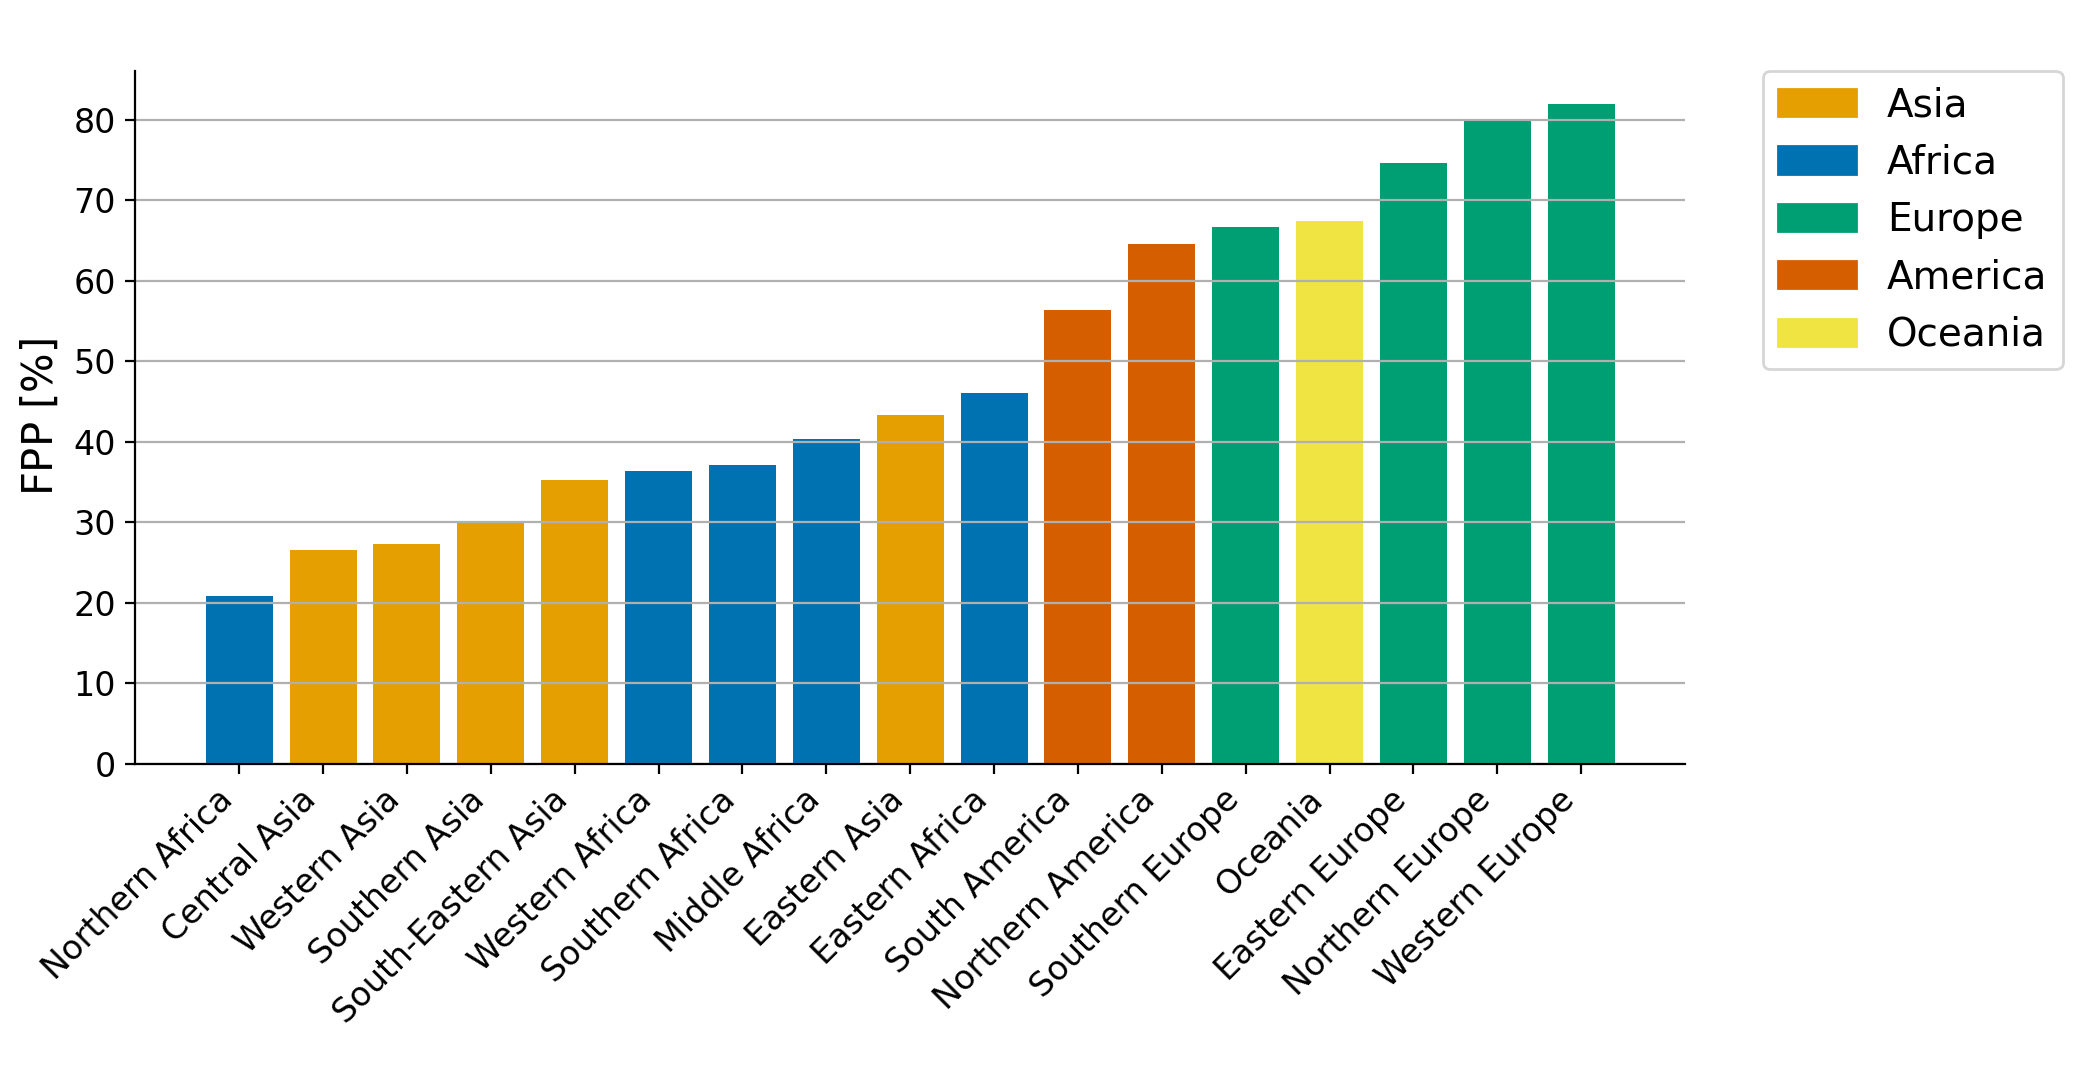

In [7]:
# Plotting the bar plot
f, ax = plt.subplots(figsize=(10, 4.5))
ax = set_font(ax, 12)
plt.bar(dfData2020['region'], dfData2020['poprel'], color=colors)
# Adding labels and title
plt.xlabel(' ')
plt.ylabel('FPP '+r'$[\%]$', size=15)
plt.title(' ', size=16)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Creating legend patches
patches = [mpatches.Patch(color=color, label=continent) for continent, color in CONTINENT_COLORS.items()]
# Adding the legend outside the plot
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=14)
plt.xticks(rotation=45, ha='right');
#ax.set_yscale('log')


In [19]:
fout = os.path.join(fhn_dir, 'Figures/FPP_poprel2020.tiff')
f.savefig(fout, dpi=300, bbox_inches='tight')

### 2.3 Pop absolute

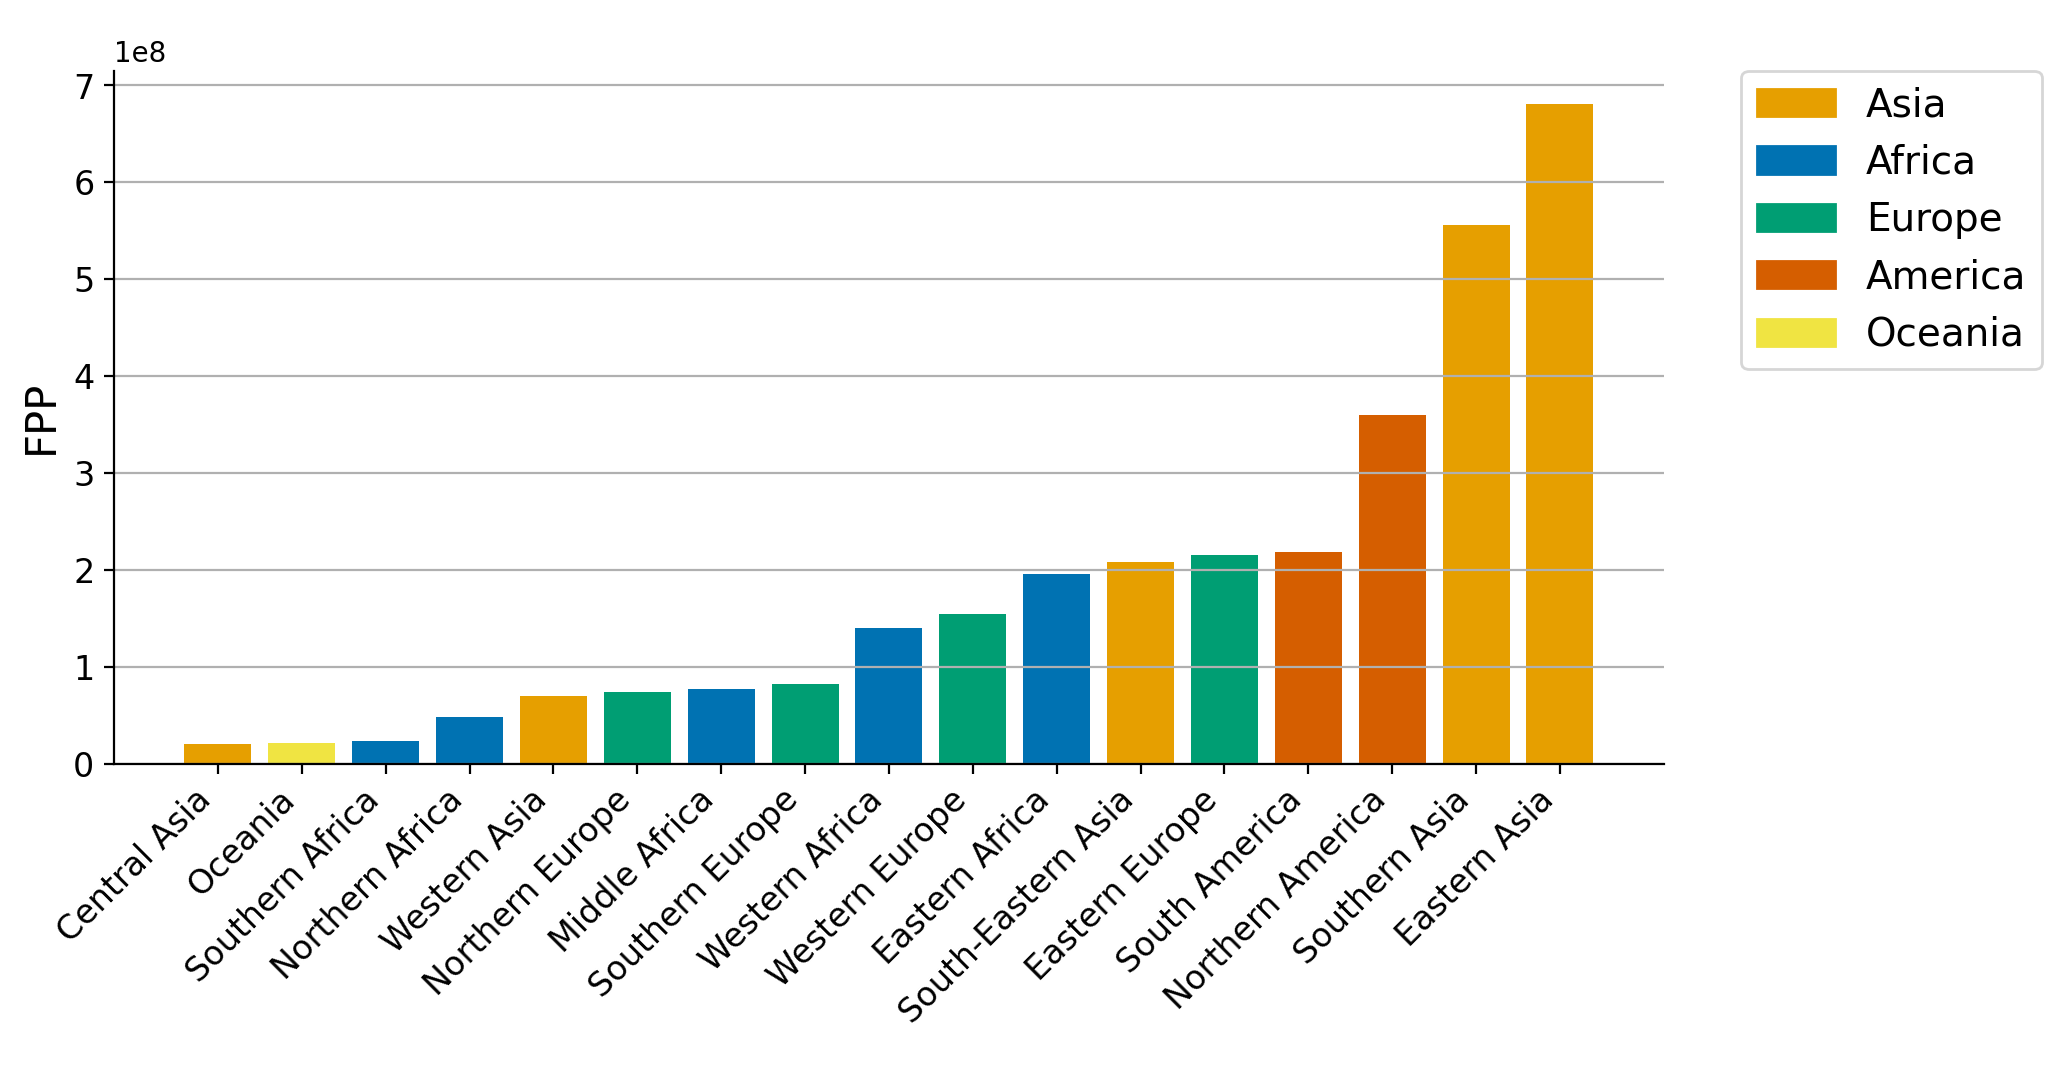

In [11]:
df1 = dfDataFPP[dfDataFPP['year']==2020].reset_index(drop=True)
dfData2020 = df1.sort_values(by='sum').reset_index(drop=True)
colors = dfData2020['region'].map(REGION_TO_CONTINENT).map(CONTINENT_COLORS)

# Plotting the bar plot
f, ax = plt.subplots(figsize=(10, 4.5))
ax = set_font(ax, 12)
plt.bar(dfData2020['region'], dfData2020['sum'], color=colors)
# Adding labels and title
plt.xlabel(' ')
plt.ylabel('FPP', size=15)
plt.title(' ', size=16)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Creating legend patches
patches = [mpatches.Patch(color=color, label=continent) for continent, color in CONTINENT_COLORS.items()]
# Adding the legend outside the plot
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=14)
plt.xticks(rotation=45, ha='right');
#ax.set_yscale('log')

In [13]:
fout = '../Figures/FPP_absolute_2020.pdf'
f.savefig(fout, dpi=300, bbox_inches='tight')

### 2.4 Relative change

In [14]:
df1a = dfDataFPP[dfDataFPP['year']==1975].reset_index(drop=True)
df2a = dfDataPOP[dfDataPOP['year']==1975].reset_index(drop=True)

df1b = dfDataFPP[dfDataFPP['year']==2020].reset_index(drop=True)
df2b = dfDataPOP[dfDataPOP['year']==2020].reset_index(drop=True)

In [15]:
df11 = df1b.copy()
df11['change'] = df1b['sum'] - df1a['sum']

df22 = df2b.copy()
df22['change'] = df2b['sum'] - df2a['sum']

In [16]:
df_final = df11.copy()
poprel1975 = df1a['sum'] / df2a['sum']
poprel2020 = df1b['sum'] / df2b['sum']
df_final['relchange'] = 100*(poprel2020-poprel1975) / poprel1975

In [17]:
df_final = df_final.sort_values(by='relchange').reset_index(drop=True)
colors = df_final['region'].map(REGION_TO_CONTINENT).map(CONTINENT_COLORS)

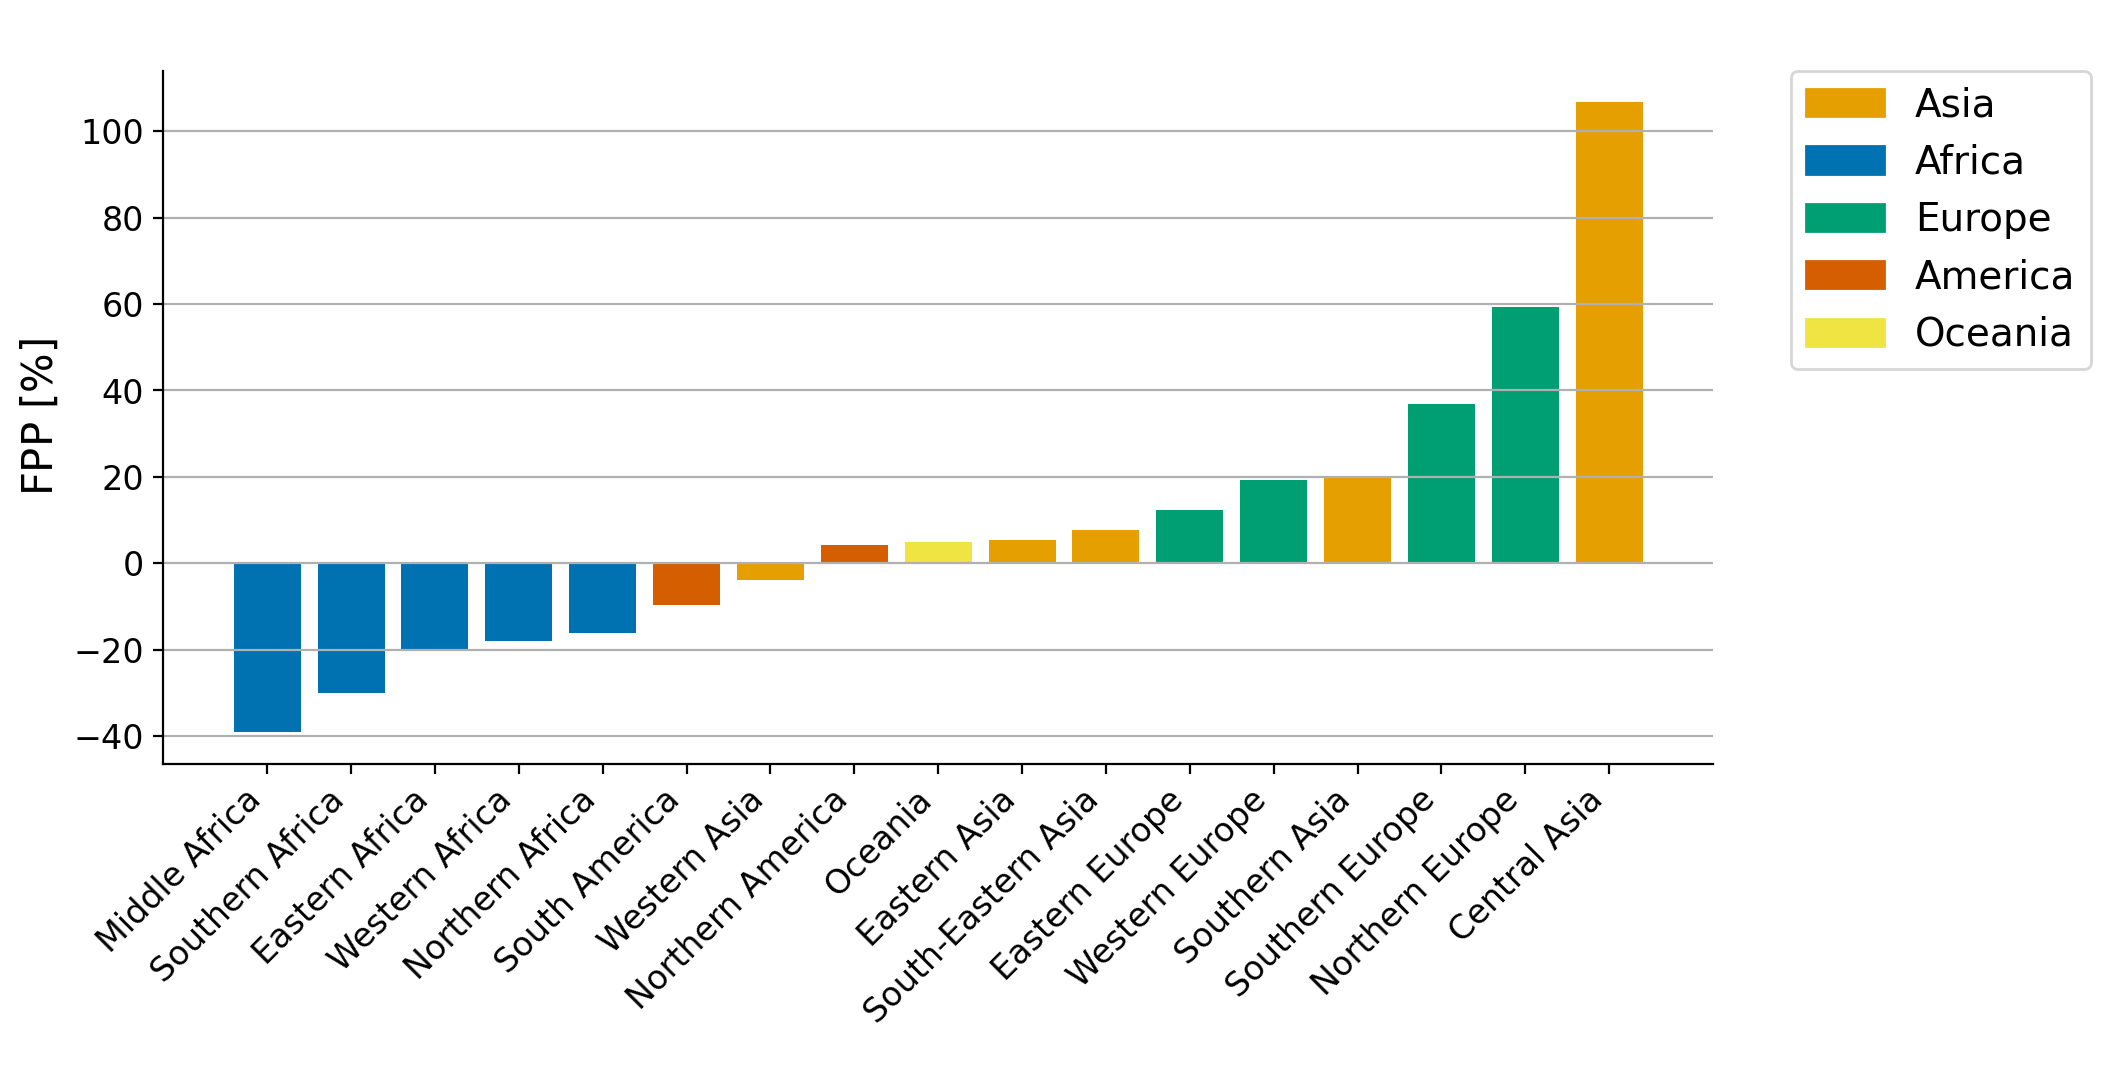

In [18]:
f, ax = plt.subplots(figsize=(10, 4.5))
ax = set_font(ax, 12)
plt.bar(df_final['region'], df_final['relchange'], color=colors)
# Adding labels and title
plt.xlabel(' ')
plt.ylabel('FPP '+r'$[\%]$', size=15)
plt.title(' ', size=16)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Creating legend patches
patches = [mpatches.Patch(color=color, label=continent) for continent, color in CONTINENT_COLORS.items()]
# Adding the legend outside the plot
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=14)
plt.xticks(rotation=45, ha='right');

In [20]:
fout = '../Figures/FPP_relchange.pdf'
f.savefig(fout, dpi=300, bbox_inches='tight')